## Task_5- To explore Business Analytics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("SampleSuperstore.csv")

## Import Data and Print it-

In [3]:
print("Import Super-store Data--")
df

Import Super-store Data--


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Checking all basic details of Data-

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Finding Error or null value in data and solve it-

In [7]:
pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


<font color=darkblue>
*  According to upper table we see they have not an error or null value in data

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


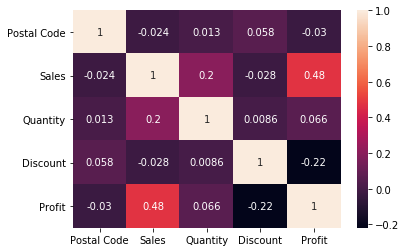

In [10]:
sns.heatmap(df.corr(), annot=True)

<font color=darkblue>
* As we see Correlation in 'Sales & Profit' and 'Sales & Quantity' is Majore-

## Now we Analysis Data's-

In [11]:
Reg_Profit=df.groupby('Region').Profit.sum().sort_values(ascending = False).reset_index()
Reg_Sales=df.groupby('Region').Sales.sum().sort_values(ascending = False).reset_index()

### According Region Base Sale-Profit Data-

In [12]:
Reg_1 = pd.merge(Reg_Sales, Reg_Profit, how='right',on='Region')
Reg_1.rename(columns = {'Sales':'Total_Sales','Profit':'Total_Profit'}, inplace = True)
Reg_1

,Region,Total_Sales,Total_Profit
0,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
2,Central,501239.8908,39706.3625
3,South,391721.9050,46749.4303


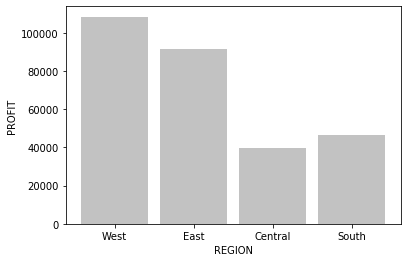

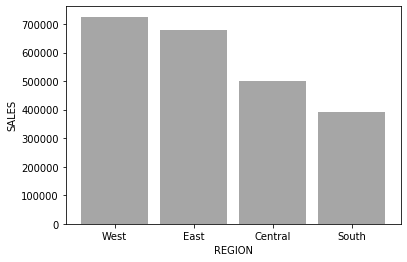

In [13]:
plt.bar(Reg_1['Region'],Reg_1['Total_Profit'], width=0.85, alpha=0.7, color='darkgrey', ecolor='black')
plt.ylabel('PROFIT')
plt.xlabel('REGION')
plt.show()

plt.bar(Reg_1['Region'],Reg_1['Total_Sales'], width=0.85, alpha=0.7, color='grey', ecolor='black')
plt.ylabel('SALES')
plt.xlabel('REGION')
plt.show()

### Comparison of Region Sales & Profit-

Text(0, 0.5, 'TOTAL SALES--PROFIT')

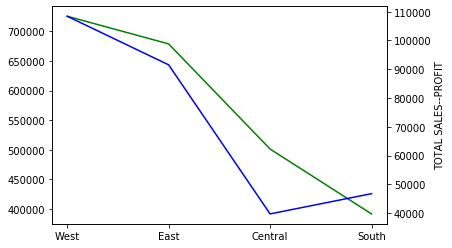

In [14]:
fig, ax1 = plt.subplots()
x = Reg_1['Region']
y1 = Reg_1['Total_Sales']
y2 = Reg_1['Total_Profit']
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
plt.xlabel('REGION')
plt.ylabel('TOTAL SALES--PROFIT')

<font color=darkblue>
* As in above Details it's clear that West and East both have high in Profit and Sales

In [15]:
Profit_Detail=df.groupby(['Region','State']).Profit.sum().sort_values(ascending = False).reset_index()
Profit_Detail.rename(columns = {'Profit':'StateTotal_Profit'}, inplace = True)
Profit_Detail1=df.groupby(['Region','State']).Sales.sum().sort_values(ascending = False).reset_index()
Profit_Detail2=Profit_Detail1.drop(['Region'], axis = 1)
Profit_Detail2.rename(columns = {'Sales':'StateTotal_Sales'}, inplace = True)
merge = pd.merge(Profit_Detail, Profit_Detail2, how='right',on='State')
merge

,Region,State,StateTotal_Profit,StateTotal_Sales
0,West,California,76381.3871,457687.6315
1,East,New York,74038.5486,310876.2710
2,West,Washington,33402.6517,138641.2700
3,Central,Michigan,24463.1876,76269.6140
4,South,Virginia,18597.9504,70636.7200
5,Central,Indiana,18382.9363,53555.3600
6,South,Georgia,16250.0433,49095.8400
7,South,Kentucky,11199.6966,36591.7500
8,Central,Minnesota,10823.1874,29863.1500
9,East,Delaware,9977.3748,27451.0690


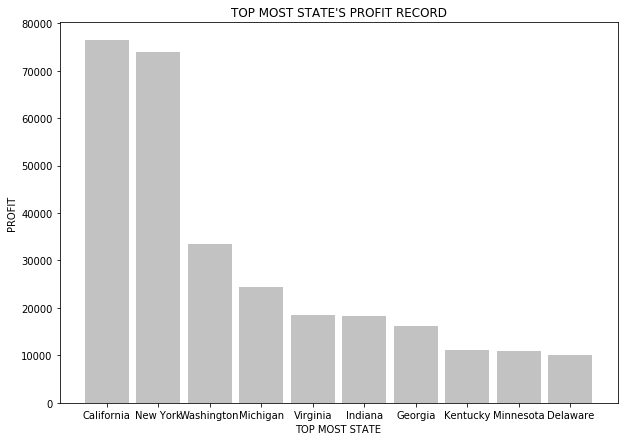

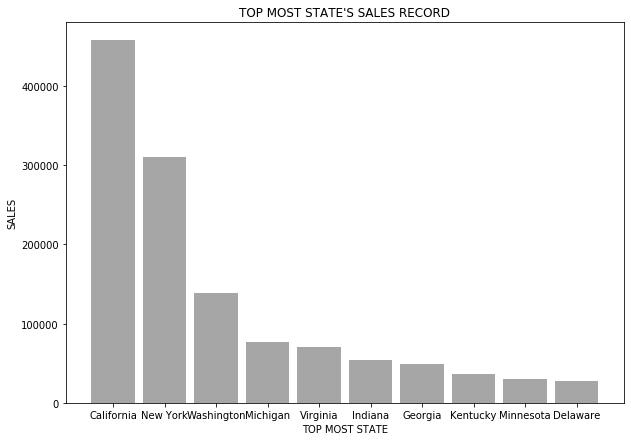

In [16]:
plt.figure(figsize=(10,7))
x=merge['State'].head(10)
y=merge['StateTotal_Profit'].head(10)
plt.bar(x,y, width=0.85, alpha=0.7, color='darkgrey',  ecolor='black')
plt.title("TOP MOST STATE'S PROFIT RECORD")
plt.ylabel('PROFIT')
plt.xlabel('TOP MOST STATE')
plt.show()

plt.figure(figsize=(10,7))
x=merge['State'].head(10)
y=merge['StateTotal_Sales'].head(10)
plt.bar(x,y, width=0.85, alpha=0.7, color='grey',  ecolor='black')
plt.title("TOP MOST STATE'S SALES RECORD")
plt.ylabel('SALES')
plt.xlabel('TOP MOST STATE')
plt.show()

### Comparison of State Sales & Profit-

Text(0, 0.5, 'TOTAL SALES--PROFIT')

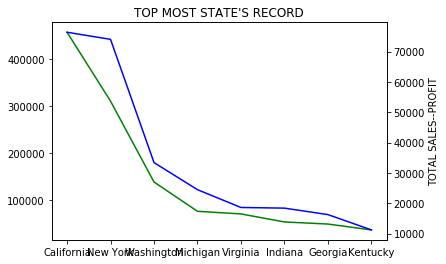

In [17]:
fig, ax1 = plt.subplots()
x = merge['State'].head(8)
y1 = merge['StateTotal_Sales'].head(8)
y2 = merge['StateTotal_Profit'].head(8)
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
plt.title("TOP MOST STATE'S RECORD")
plt.xlabel('TOP MOST STATE')
plt.ylabel('TOTAL SALES--PROFIT')

<font color=darkblue> 
* As we can Clearly see that 'California' state have Not only Max. Sales but also Max. Profit.

In [18]:
Quantity_Sales=df.groupby(['Quantity']).Sales.sum().sort_values(ascending = False).reset_index()
Quantity_Profit=df.groupby(['Quantity']).Profit.sum().reset_index()
ToatalQuantity=df['Quantity'].value_counts().sort_values(ascending = False).reset_index()
ToatalQuantity.rename(columns = {'index':'Quantity','Quantity':'Total_Quantity'}, inplace = True)
Quantity_Profit.rename(columns = {'Profit':'Overall_Profit'}, inplace = True)
Quantity_Sales.rename(columns = {'Sales':'Overall_Sales'}, inplace = True)
mrg = pd.merge(Quantity_Sales, Quantity_Profit, how='right',on='Quantity')
merge_1=pd.merge(mrg, ToatalQuantity, how='right',on='Quantity')

In [19]:
merge_1=merge_1[['Quantity','Total_Quantity','Overall_Sales','Overall_Profit']]
merge_1

,Quantity,Total_Quantity,Overall_Sales,Overall_Profit
0,3,2409,422060.6007,57015.5250
1,5,1230,415661.6965,49516.5945
2,4,1191,323670.9944,44223.3908
3,2,2402,289091.4798,38448.4088
4,7,606,239908.3659,34286.9730
5,6,572,207122.3214,10325.4678
6,9,258,128505.5901,17687.8908
7,8,257,117760.1760,10856.7960
8,1,899,53251.9345,7440.4801
9,13,27,32338.1890,6348.9010


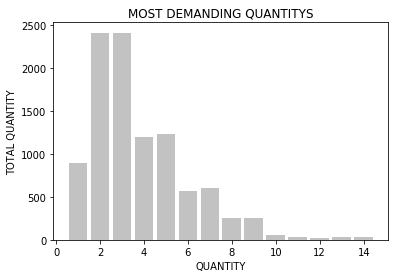

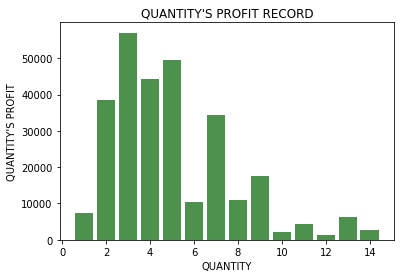

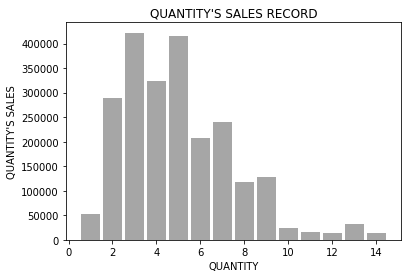

In [20]:
plt.bar(merge_1['Quantity'],merge_1['Total_Quantity'], width=0.85, alpha=0.7, color='darkgrey', ecolor='black')
plt.title("MOST DEMANDING QUANTITYS")
plt.ylabel('TOTAL QUANTITY')
plt.xlabel('QUANTITY')
plt.show()

plt.bar(merge_1['Quantity'],merge_1['Overall_Profit'], width=0.85, alpha=0.7, color='darkgreen',  ecolor='black')
plt.title("QUANTITY'S PROFIT RECORD")
plt.ylabel("QUANTITY'S PROFIT")
plt.xlabel('QUANTITY')
plt.show()

plt.bar(merge_1['Quantity'],merge_1['Overall_Sales'], width=0.85, alpha=0.7, color='grey',  ecolor='black')
plt.title("QUANTITY'S SALES RECORD")
plt.ylabel("QUANTITY'S SALES")
plt.xlabel('QUANTITY')
plt.show()

<font color=darkblue>
* From Upper Data it's clear that Quantity 2-3-4-5-6 is most Demanding in market

In [21]:
SM_profit=df.groupby(['Ship Mode']).Profit.sum().sort_values(ascending = False).reset_index()
SM_sales=df.groupby(['Ship Mode']).Sales.sum().sort_values(ascending = False).reset_index()
merge_2 = pd.merge(SM_profit, SM_sales, how='right',on='Ship Mode')
merge_2.rename(columns = {'Sales':'Total_Sales','Profit':'Total_Profit'}, inplace = True)
merge_2

,Ship Mode,Total_Profit,Total_Sales
0,Standard Class,164088.7875,1.358216e+06
1,Second Class,57446.6354,4.591936e+05
2,First Class,48969.8399,3.514284e+05
3,Same Day,15891.7589,1.283631e+05


### Comparison of Ship Mode Sales & Profit-

<Figure size 1440x504 with 0 Axes>

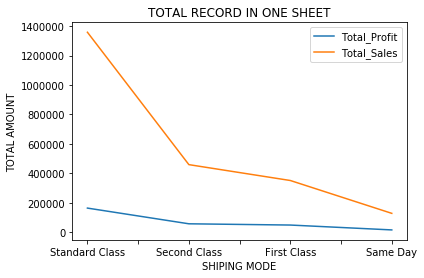

In [22]:
plt.figure(figsize=(20,7))
merge_2.plot(x='Ship Mode', y=['Total_Profit', 'Total_Sales'])
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('SHIPING MODE')
plt.ylabel('TOTAL AMOUNT')
plt.show()

In [23]:
GP=df.groupby(['Ship Mode','Segment']).Sales.sum().sort_values(ascending = False).reset_index()
GP1=df.groupby(['Ship Mode','Segment']).Profit.sum().sort_values(ascending = False).reset_index()
GP1=GP1.drop(['Segment'], axis = 1)
merge_3 = pd.merge(GP, GP1, how='right',on='Ship Mode')
merge_3.rename(columns = {'Sales':'Total_Sales','Profit':'Total_Profit'}, inplace = True)
merge_3

,Ship Mode,Segment,Total_Sales,Total_Profit
0,Standard Class,Consumer,710137.0714,77924.0490
1,Standard Class,Corporate,409040.5351,77924.0490
2,Standard Class,Home Office,239038.1365,77924.0490
3,Standard Class,Consumer,710137.0714,57470.8067
4,Standard Class,Corporate,409040.5351,57470.8067
5,Standard Class,Home Office,239038.1365,57470.8067
6,Standard Class,Consumer,710137.0714,28693.9318
7,Standard Class,Corporate,409040.5351,28693.9318
8,Standard Class,Home Office,239038.1365,28693.9318
9,Second Class,Consumer,231498.9496,24946.9112


Text(0, 0.5, 'TOTAL VALUE OF SHIPING_MODE')

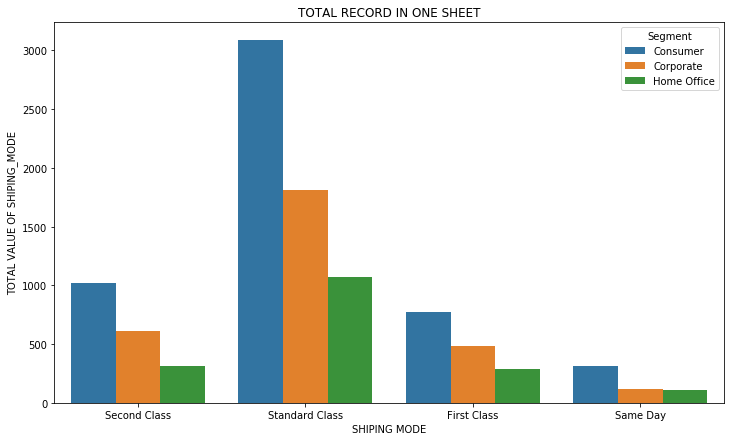

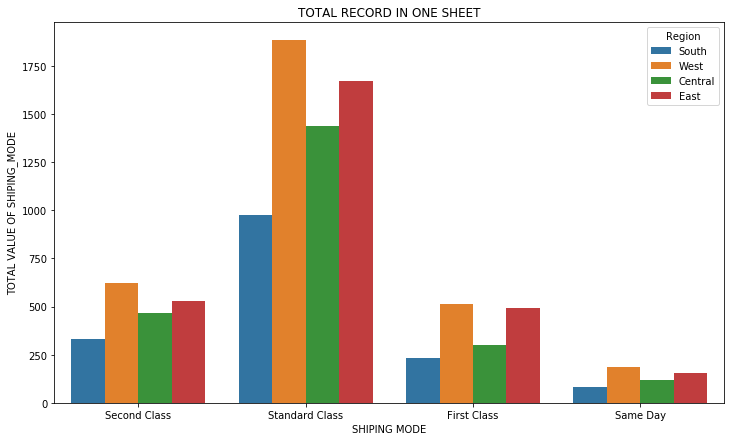

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='Ship Mode',hue='Segment')
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('SHIPING MODE')
plt.ylabel('TOTAL VALUE OF SHIPING_MODE')

plt.figure(figsize=(12,7))
sns.countplot(data=df,x='Ship Mode',hue='Region')
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('SHIPING MODE')
plt.ylabel('TOTAL VALUE OF SHIPING_MODE')

<font color=darkblue> 
* As we can clearly Say that 'Standard-Class' have Maximum Demand in Region as well as Segment.

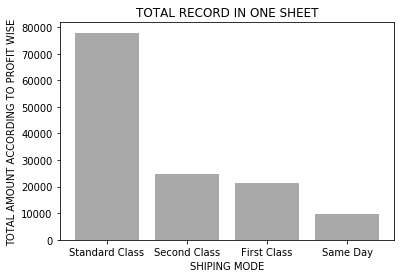

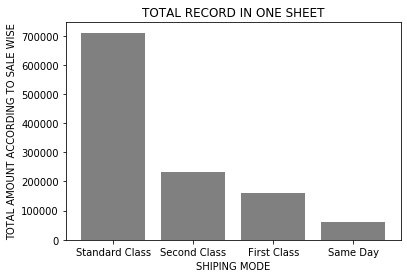

In [25]:
y=merge_3['Total_Profit']
x=merge_3['Ship Mode']
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('SHIPING MODE')
plt.ylabel('TOTAL AMOUNT ACCORDING TO PROFIT WISE')
plt.bar(x,y,color='darkgray')
plt.show()

y=merge_3['Total_Sales']
x=merge_3['Ship Mode']
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('SHIPING MODE')
plt.ylabel('TOTAL AMOUNT ACCORDING TO SALE WISE')
plt.bar(x,y,color='grey')
plt.show()


<font color=darkblue> 
* As we can see 'Standard Class' have Provide Max. Profit and Sales.

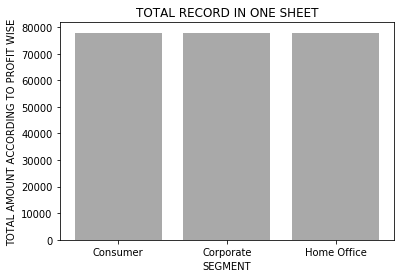

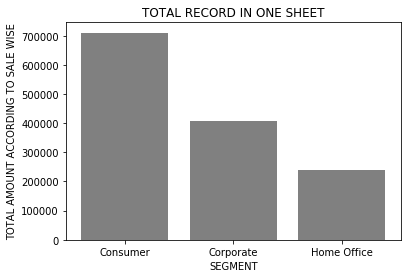

In [26]:
y=merge_3['Total_Profit']
x=merge_3['Segment']
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('SEGMENT')
plt.ylabel('TOTAL AMOUNT ACCORDING TO PROFIT WISE')
plt.bar(x,y,color='darkgray')
plt.show()

y=merge_3['Total_Sales']
x=merge_3['Segment']
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('SEGMENT')
plt.ylabel('TOTAL AMOUNT ACCORDING TO SALE WISE')
plt.bar(x,y,color='grey')
plt.show()

<font color=darkblue> 
* As we See 'Segment' have almost equal Profit but Sales have Consumed highest.

In [27]:
GP_2=df.groupby(['Category']).Profit.sum().sort_values(ascending = False).reset_index()
GP_3=df.groupby(['Category']).Sales.sum().sort_values(ascending = False).reset_index()
GP_3.rename(columns = {'Sales':'C_TotalSales'}, inplace = True)
GP_2.rename(columns = {'Profit':'C_TotalProfit'}, inplace = True)
merge1 = pd.merge(GP_3, GP_2, how='right',on='Category')
merge1

,Category,C_TotalSales,C_TotalProfit
0,Technology,836154.0330,145454.9481
1,Furniture,741999.7953,18451.2728
2,Office Supplies,719047.0320,122490.8008


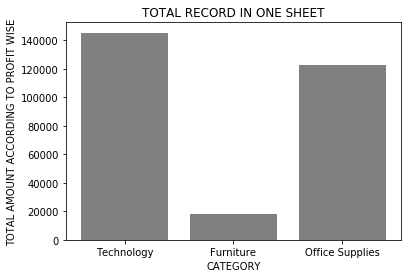

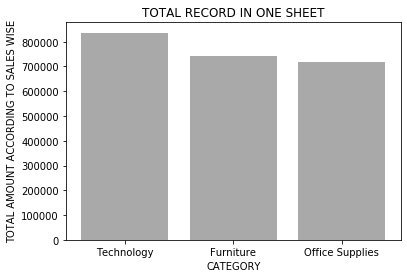

In [28]:
y=merge1['C_TotalProfit']
x=merge1['Category']
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('CATEGORY')
plt.ylabel('TOTAL AMOUNT ACCORDING TO PROFIT WISE')
plt.bar(x,y,color='gray')
plt.show()

y=merge1['C_TotalSales']
x=merge1['Category']
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('CATEGORY')
plt.ylabel('TOTAL AMOUNT ACCORDING TO SALES WISE')
plt.bar(x,y,color='darkgray')
plt.show()

<font color=darkblue> 
* As we can Clearly see 'Furniture' Category is lowest Profit.
* As we see Sales in every Category is Almost equal.    

#### Analysis According Category-

In [29]:
GP_4=df.groupby(['Sub-Category']).Profit.sum().sort_values(ascending = False).reset_index()
GP_5=df.groupby(['Sub-Category']).Sales.sum().sort_values(ascending = False).reset_index()
GP_5.rename(columns = {'Sales':'SC_TotalSales'}, inplace = True)
GP_4.rename(columns = {'Profit':'SC_TotalProfit'}, inplace = True)
merge2 = pd.merge(GP_4, GP_5, how='right',on='Sub-Category')
merge2

,Sub-Category,SC_TotalProfit,SC_TotalSales
0,Copiers,55617.8249,149528.0300
1,Phones,44515.7306,330007.0540
2,Accessories,41936.6357,167380.3180
3,Paper,34053.5693,78479.2060
4,Binders,30221.7633,203412.7330
5,Chairs,26590.1663,328449.1030
6,Storage,21278.8264,223843.6080
7,Appliances,18138.0054,107532.1610
8,Furnishings,13059.1436,91705.1640
9,Envelopes,6964.1767,16476.4020


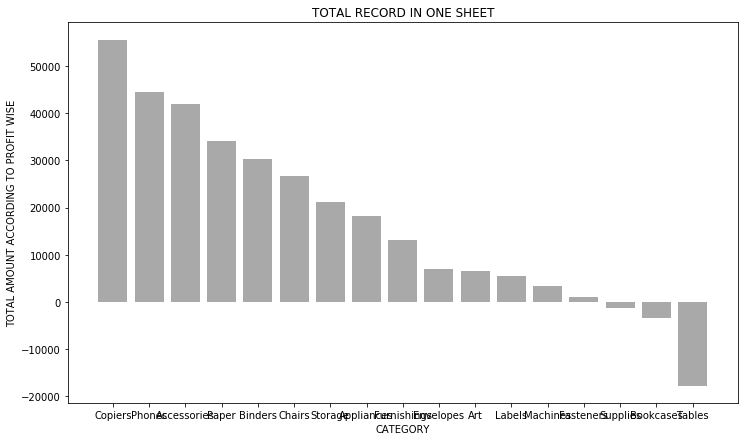

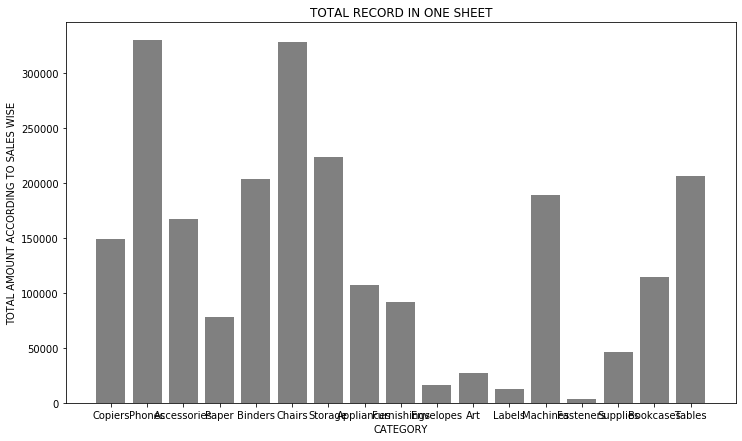

In [30]:
plt.figure(figsize=(12,7))
y=merge2['SC_TotalProfit']
x=merge2['Sub-Category']
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('CATEGORY')
plt.ylabel('TOTAL AMOUNT ACCORDING TO PROFIT WISE')
plt.bar(x,y,color='darkgray')
plt.show()

plt.figure(figsize=(12,7))
y=merge2['SC_TotalSales']
x=merge2['Sub-Category']
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('CATEGORY')
plt.ylabel('TOTAL AMOUNT ACCORDING TO SALES WISE')
plt.bar(x,y,color='gray')
plt.show()

<font color=darkblue> 
* As we can Clearly see due to "Supplies,Bookcase & Tables" Company face Loss.
* AS we can See "Phone and Chairs" have max. Sales in market.

#### Pie Chart-

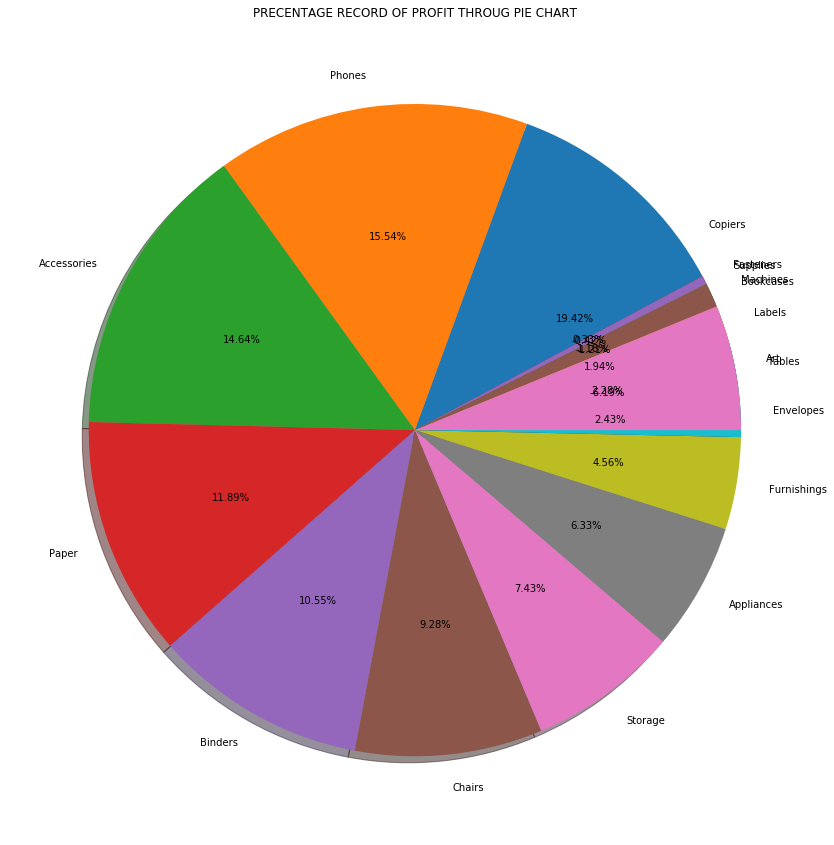

-----------------------------------------------------------------------------------------------------------------------


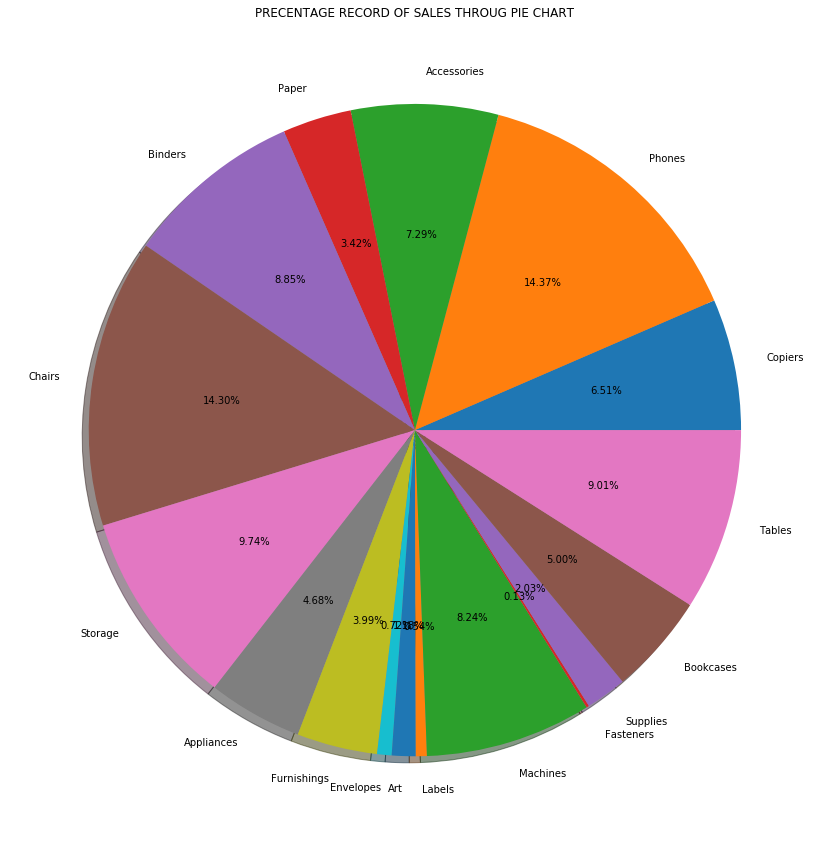

In [39]:
plt.figure(figsize=(15,15))
plt.pie(merge2['SC_TotalProfit'],labels=merge2['Sub-Category'],autopct='%0.2f%%',shadow=True,counterclock=True)
plt.title("PRECENTAGE RECORD OF PROFIT THROUG PIE CHART")
plt.show()
print('-----------------------------------------------------------------------------------------------------------------------')
plt.figure(figsize=(15,15))
plt.pie(merge2['SC_TotalSales'],labels=merge2['Sub-Category'],autopct='%0.2f%%',shadow=True,counterclock=True)
plt.title("PRECENTAGE RECORD OF SALES THROUG PIE CHART")
plt.show()

### Analysis According Discount-

In [32]:
GP2=df.groupby(['Quantity']).Discount.sum().sort_values(ascending = False).reset_index()
GP3=df.groupby(['Quantity']).Profit.sum().sort_values(ascending = False).reset_index()
merge3 = pd.merge(GP2, GP3, how='right',on='Quantity')
merge3.rename(columns = {'Discount':'Overall_Discount','Profit':'Overall_Profit'}, inplace = True)
merge3

,Quantity,Overall_Discount,Overall_Profit
0,2,371.97,38448.4088
1,3,369.37,57015.5250
2,5,193.29,49516.5945
3,4,187.83,44223.3908
4,1,137.51,7440.4801
5,7,98.16,34286.9730
6,6,95.27,10325.4678
7,8,44.10,10856.7960
8,9,38.17,17687.8908
9,10,10.87,2044.1570


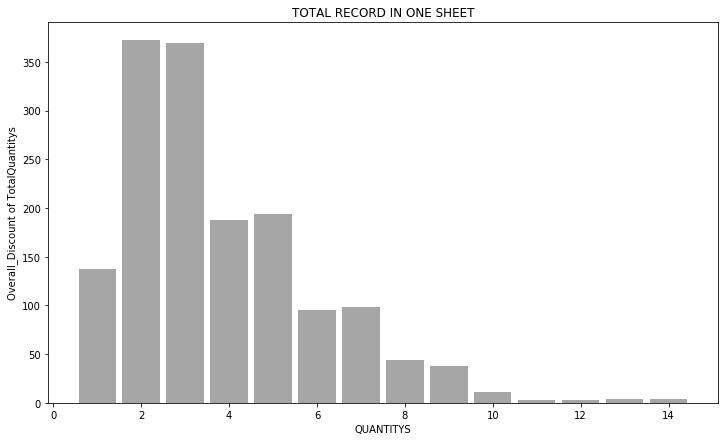

In [33]:
plt.figure(figsize=(12,7))
plt.bar(merge3['Quantity'],merge3['Overall_Discount'], width=0.85,alpha=0.7, color='grey',ecolor='black')
plt.title("TOTAL RECORD IN ONE SHEET")
plt.ylabel('Overall_Discount of TotalQuantitys')
plt.xlabel('QUANTITYS')
plt.show()

In [34]:
GP4=df.groupby(['Category']).Discount.sum().sort_values(ascending = False).reset_index()
GP5=df.groupby(['Category']).Profit.sum().sort_values(ascending = False).reset_index()
merge4 = pd.merge(GP4, GP5, how='right',on='Category')
merge4.rename(columns = {'Discount':'Overall_Discount','Profit':'Overall_Profit'}, inplace = True)
merge4

,Category,Overall_Discount,Overall_Profit
0,Office Supplies,947.80,122490.8008
1,Furniture,368.89,18451.2728
2,Technology,244.40,145454.9481


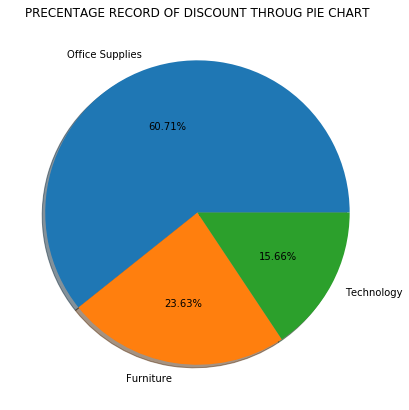

In [35]:
plt.figure(figsize=(12,7))
plt.pie(merge4['Overall_Discount'],labels=merge4['Category'],autopct='%0.2f%%',shadow=True,counterclock=True)
plt.title("PRECENTAGE RECORD OF DISCOUNT THROUG PIE CHART")
plt.show()

In [36]:
GP6=df.groupby(['Sub-Category']).Discount.sum().sort_values(ascending = False).reset_index()
GP7=df.groupby(['Sub-Category']).Profit.sum().sort_values(ascending = False).reset_index()
merge5 = pd.merge(GP6, GP7, how='right',on='Sub-Category')
merge5.rename(columns = {'Discount':'Overall_Discount','Profit':'Overall_Profit'}, inplace = True)
merge5

,Sub-Category,Overall_Discount,Overall_Profit
0,Binders,567.00,30221.7633
1,Phones,137.40,44515.7306
2,Furnishings,132.40,13059.1436
3,Chairs,105.00,26590.1663
4,Paper,102.60,34053.5693
5,Tables,83.35,-17725.4811
6,Appliances,77.60,18138.0054
7,Storage,63.20,21278.8264
8,Accessories,60.80,41936.6357
9,Art,59.60,6527.7870


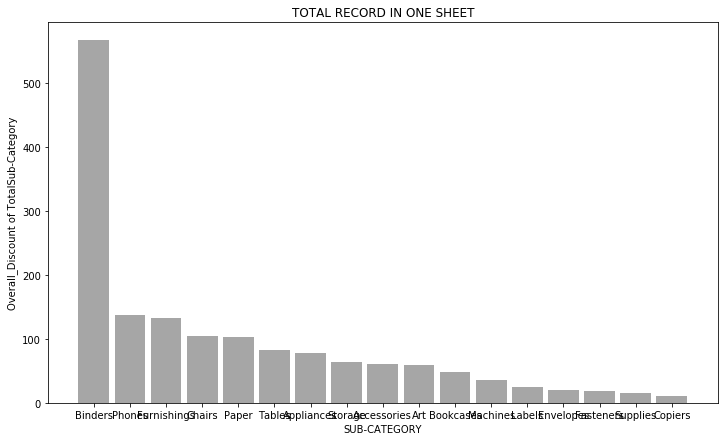

In [37]:
plt.figure(figsize=(12,7))
plt.bar(merge5['Sub-Category'],merge5['Overall_Discount'], width=0.85,alpha=0.7, color='grey',ecolor='black')
plt.title("TOTAL RECORD IN ONE SHEET")
plt.ylabel('Overall_Discount of TotalSub-Category')
plt.xlabel('SUB-CATEGORY')
plt.show()

<font color=darkblue> 
* In above Calulation have Max Discount in 2 & 3 Quantity.
* In above Calulation have Max Discount in Office Supplies Category.
* In Above Calulation have Max Discount in Binders Sub-Category.

## Pair-Plote of Complete Data-

<Figure size 432x288 with 0 Axes>

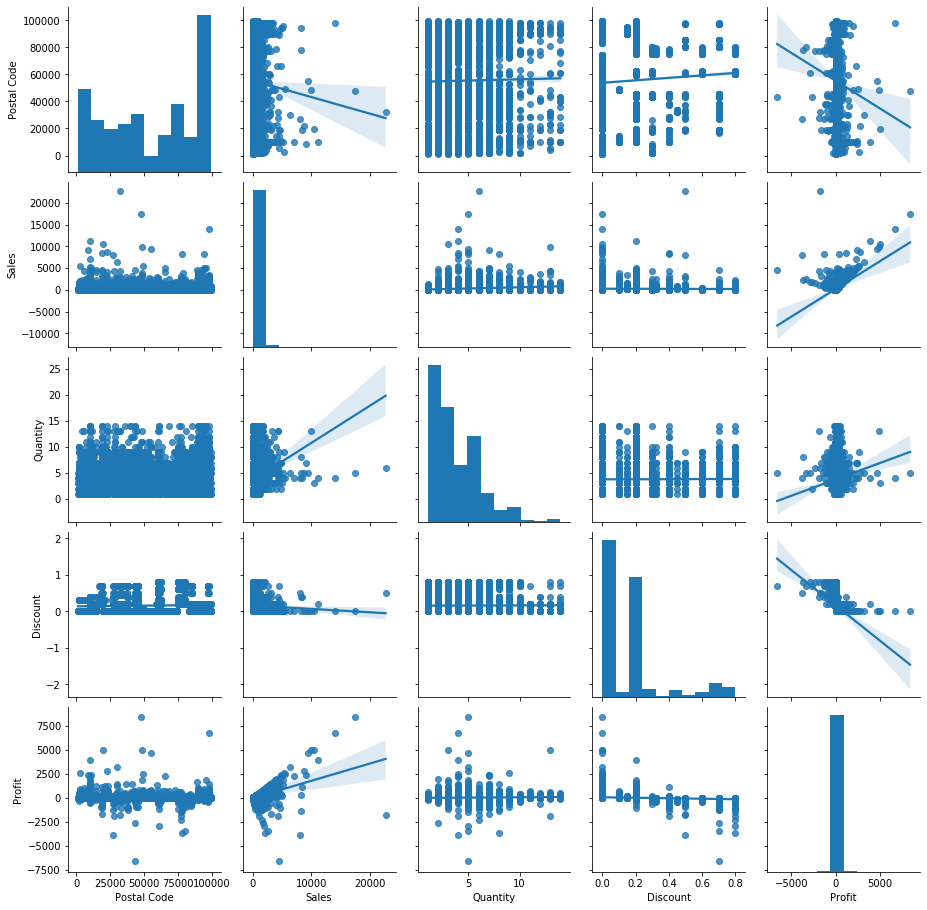

None

In [38]:
plt.figure()
sns.pairplot(df, kind="reg")  
display(plt.show())

## Thank You